In [163]:
!pip install  dataprep

In [164]:
!pip install matplotlib-venn

In [165]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [166]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [167]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [168]:
!pip install cartopy
import cartopy

In [169]:
# ================================================================
# STEP 1: Install only safe, compatible packages
# ================================================================
!pip install -q country_converter rapidfuzz

# ================================================================
# STEP 2: Imports
# ================================================================
import numpy as np
import pandas as pd
import math
from datetime import timedelta, datetime
import country_converter as coco
from rapidfuzz import fuzz
import matplotlib.pyplot as plt

# Matplotlib settings
%matplotlib inline
plt.style.use("seaborn-v0_8")  # newer seaborn style name
plt.rcParams["figure.figsize"] = (20, 5)

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd

# Correct function is read_excel (not read_xlsx)
df = pd.read_csv('/content/drive/MyDrive/Project Work/Customer segmentation /1st Jan to 9th Sep - FactSales.csv')

# Display the dataframe
df


,Customer_ID,Invoice number,Date,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month
0,95591,POS137202501240195,1/24/2025,Tanjim,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801623195591,0,1/25
1,18816,POS137202501230217,1/23/2025,Nargis Akhtar,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801685518816,0,1/25
2,24845,POS137202501260462,1/26/2025,Reza hasan,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801703524845,0,1/25
3,90842,POS137202501260511,1/26/2025,Imran,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801714790842,0,1/25
4,90978,POS137202501260525,1/26/2025,Ana,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801743690978,0,1/25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253526,88615,POS1372025072418663,7/24/2025,Rafi,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801703788615,4,3/25
253527,17141,POS1372025072418630,7/24/2025,Kazi Sazzad Shahid Shadhin,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801621317141,3,3/25
253528,4324,POS137202507513595,7/5/2025,Hasan,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801774304324,0,3/25
253529,75217,POS137202507613997,7/6/2025,Asraful,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801819475217,4,3/25


In [182]:
# Print the shape and basic information about the data.
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253531 entries, 0 to 253530
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Customer_ID                    253531 non-null  int64 
 1   Invoice number                 253531 non-null  object
 2   Date                           253531 non-null  object
 3   Customer Name                  252349 non-null  object
 4   Location                       253531 non-null  object
 5   Sales Channel                  253531 non-null  object
 6   Sales Price Amount             253531 non-null  object
 7   Net Price Amount               253531 non-null  object
 8   Quantity                       253531 non-null  int64 
 9   Price()                        253531 non-null  object
 10  Product Category               253531 non-null  object
 11  Discount                       253531 non-null  object
 12  Payment Way Cash               253531 non-nu

((253531, 19), None)

In [183]:
df.columns

Index(['Customer_ID', 'Invoice number', 'Date', 'Customer Name', 'Location',
       'Sales Channel', 'Sales Price Amount', 'Net Price Amount', 'Quantity',
       'Price()', 'Product Category', 'Discount', 'Payment Way Cash',
       'Payment Way Card/Others', 'Customer contact Number',
       'Month Since First Transaction', 'Cohort Month', 'Month', 'Year'],
      dtype='object')

In [184]:
# Modify Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y/%m/%d')
df

,Customer_ID,Invoice number,Date,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month,Month,Year
0,95591,POS137202501240195,2025/01/24,Tanjim,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801623195591,0,1/25,2025,01
1,18816,POS137202501230217,2025/01/23,Nargis Akhtar,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801685518816,0,1/25,2025,01
2,24845,POS137202501260462,2025/01/26,Reza hasan,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801703524845,0,1/25,2025,01
3,90842,POS137202501260511,2025/01/26,Imran,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801714790842,0,1/25,2025,01
4,90978,POS137202501260525,2025/01/26,Ana,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801743690978,0,1/25,2025,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253526,88615,POS1372025072418663,2025/07/24,Rafi,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801703788615,4,3/25,2025,07
253527,17141,POS1372025072418630,2025/07/24,Kazi Sazzad Shahid Shadhin,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801621317141,3,3/25,2025,07
253528,4324,POS137202507513595,2025/07/05,Hasan,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801774304324,0,3/25,2025,07
253529,75217,POS137202507613997,2025/07/06,Asraful,Bashundhara City,POS,"$3,950","$3,950",1,"$3,950",Panjabi,$0,"$4,345",$0,8801819475217,4,3/25,2025,07


In [225]:
df.columns

Index(['Customer_ID', 'Invoice number', 'Date', 'Customer Name', 'Location',
       'Sales Channel', 'Sales Price Amount', 'Net Price Amount', 'Quantity',
       'Price()', 'Product Category', 'Discount', 'Payment Way Cash',
       'Payment Way Card/Others', 'Customer contact Number',
       'Month Since First Transaction', 'Cohort Month', 'Month', 'Year'],
      dtype='object')

In [226]:
#Drop Unnecessery Column
#df1 = df.drop(['Customer_ID', 'Invoice number','Customer Name','Net Price Amount','Price()','Discount', 'Payment Way Cash',
       #'Payment Way Card/Others','Cohort Month', 'Month', 'Year' ], axis=1)
#df1.head()

In [229]:
# Drop dollar sign
df['Sales Price Amount'] = (
    df['Sales Price Amount']
    .replace('[$,]', '' ,regex=True)
    .astype(int)
)
df.head()

,Customer_ID,Invoice number,Date,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month,Month,Year
0,95591,POS137202501240195,2025/01/24,Tanjim,Bashundhara City,POS,3950,"$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801623195591,0,1/25,2025,01
1,18816,POS137202501230217,2025/01/23,Nargis Akhtar,Bashundhara City,POS,3950,"$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801685518816,0,1/25,2025,01
2,24845,POS137202501260462,2025/01/26,Reza hasan,Bashundhara City,POS,3950,"$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801703524845,0,1/25,2025,01
3,90842,POS137202501260511,2025/01/26,Imran,Bashundhara City,POS,3950,"$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801714790842,0,1/25,2025,01
4,90978,POS137202501260525,2025/01/26,Ana,Bashundhara City,POS,3950,"$3,950",1,"$3,950",Panjabi,$0,$0,"$4,345",8801743690978,0,1/25,2025,01


In [230]:
# Find basic description of the Dataframe
df.describe()

,Customer_ID,Sales Price Amount,Quantity,Customer contact Number,Month Since First Transaction
count,253531.000000,253531.000000,253531.000000,2.535310e+05,253531.000000
mean,48054.053784,4358.548714,1.045955,8.963707e+12,0.841479
std,29331.337934,4522.719033,0.760868,3.544660e+13,1.800937
min,0.000000,-152.000000,1.000000,1.308653e+09,0.000000
25%,22212.000000,1950.000000,1.000000,8.801711e+12,0.000000
50%,47164.000000,3750.000000,1.000000,8.801728e+12,0.000000
75%,73506.000000,5999.000000,1.000000,8.801818e+12,0.000000
max,99999.000000,584600.000000,148.000000,8.808802e+15,8.000000


In [231]:
# Check if there are any null values in the Dataframe

df.isnull().sum()

,0
Customer_ID,0
Invoice number,0
Date,0
Customer Name,1182
Location,0
Sales Channel,0
Sales Price Amount,0
Net Price Amount,0
Quantity,0
Price(),0


In [233]:
# View the period of time included in the dataset

df['Date'].min(), df['Date'].max()

('2025/01/01', '2025/09/09')

In [234]:
# Count the number of unique country names

df['Location'].nunique()

22

In [235]:
# Count the number of unique country names

df['Sales Channel'].nunique()

2

In [243]:
# Putting date into the index for plotting the time series

dfb = df.set_index("Date")
df = df.sort_values(by='Month', ascending=True)
dfb.head()

,Customer_ID,Invoice number,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month,Month,Year
Date,,,,,,,,,,,,,,,,,,
2025/01/01,3595,POS13520250115451,Mohammed Shah Alam,Uttara,POS,695,"$1,250",1,"$1,250",Trousers,$555,$0,"$7,826",8801760403595,0,1/25,2025,01
2025/01/01,64470,POS20220250115489,Tamzid,Mirpur1,POS,1450,"$1,450",1,"$1,450",Chino,$0,$0,"$1,559",8801755364470,0,1/25,2025,01
2025/01/01,84301,SO250101000161,Mashrafe Hossin,Fulfillment Center,Online,855,"$1,850",1,"$1,850",Trousers,$995,$0,$0,8801745784301,0,1/25,2025,01
2025/01/01,98598,POS14120250115515,Akil Rahman,Sylhet,POS,5990,"$15,900",2,"$7,950",Panjabi,"$9,910",$0,"$12,126",8801321398598,0,1/25,2025,01
2025/01/01,20093,SO241231400349,ASMA AKTAR,Fulfillment Center,Online,855,"$1,850",1,"$1,850",Trousers,$995,$0,$0,8801998620093,0,1/25,2025,01


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) Liberation Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


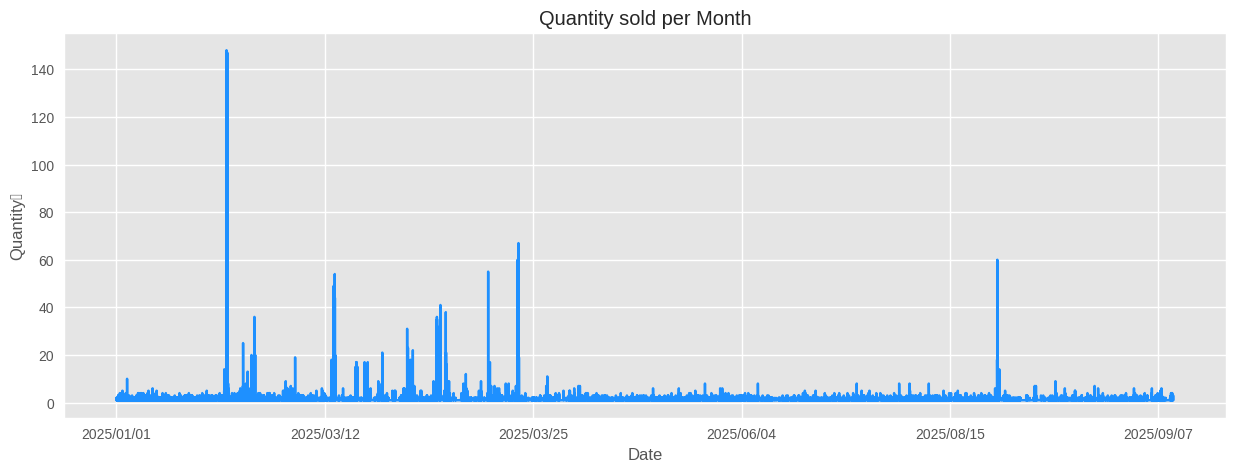

In [244]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.style.use('ggplot')
plt.title('Quantity sold per Month')

plt.ylabel('Quantity	')
plt.xlabel('Date');
df = df.sort_values(by='Date', ascending=True)
dfb['Quantity'].plot(figsize=(15,5), c='dodgerblue');

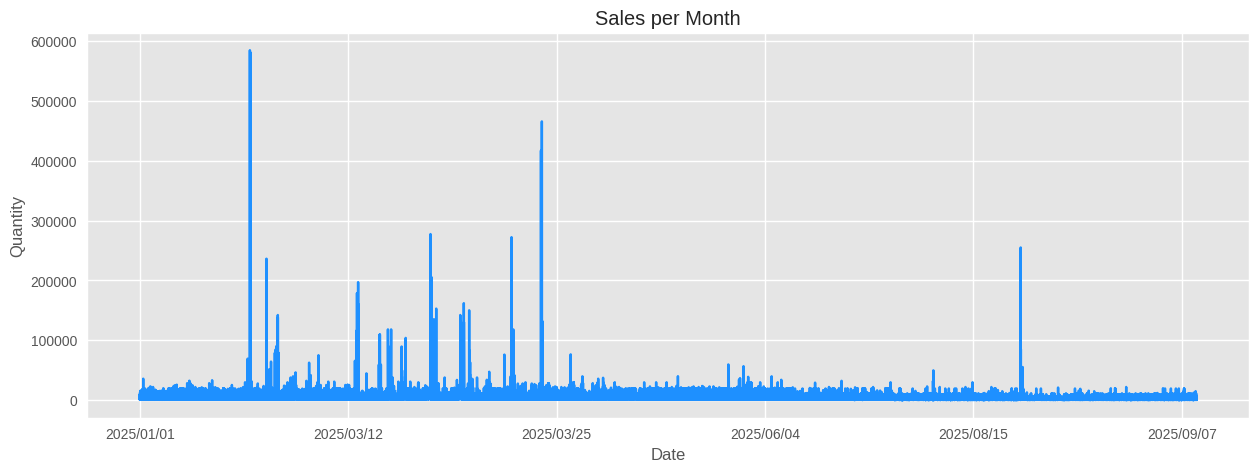

In [245]:
plt.style.use('ggplot')
plt.title('Sales per Month')

plt.ylabel('Quantity')
plt.xlabel('Date');

dfb['Sales Price Amount'].plot(figsize=(15,5), c='dodgerblue');

**Transform data to obtain RFM**

In [246]:
print('Sales from {} to {}'.format(df['Date'].min(),
                                    df['Date'].max()))

Sales from 2025/01/01 to 2025/09/09


In [248]:
from datetime import timedelta
#Let's focus on sales from last 365 days since most recent date
df['Date'] = pd.to_datetime(df['Date'])

In [250]:
#Let's focus on sales from last 365 days since most recent date

period = 365

date_N_days_ago = df['Date'].max() - timedelta(days=period)

In [252]:
# Remove the rows with dates older than 365 days ago

df = df[df['Date'] > date_N_days_ago]
df.reset_index(drop=True, inplace=True)
df.head()

,Customer_ID,Invoice number,Date,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month,Month,Year
0,3595,POS13520250115451,2025-01-01,Mohammed Shah Alam,Uttara,POS,695,"$1,250",1,"$1,250",Trousers,$555,$0,"$7,826",8801760403595,0,1/25,2025,01
1,81130,POS13520250115497,2025-01-01,Sayed Ahmed,Uttara,POS,2445,"$4,750",1,"$4,750",Shirt,"$2,305",$0,"$25,741",8801841881130,0,1/25,2025,01
2,64868,SO250101210212,2025-01-01,Mahin,Fulfillment Center,Online,1295,"$3,450",1,"$3,450",Jeans,"$2,155",$0,$0,8801864164868,0,1/25,2025,01
3,18170,POS13820250115313,2025-01-01,Rehana Akhter,Elephant Road,POS,1710,"$3,700",2,"$1,850",Trousers,"$1,990",$0,"$124,765",8801552418170,0,1/25,2025,01
4,37518,SO250101630048,2025-01-01,Shamim Ahmmed,Fulfillment Center,Online,1295,"$3,450",1,"$3,450",Jeans,"$2,155",$0,$0,8801688737518,0,1/25,2025,01


In [254]:
# We set the NOW date one day after the last sale

NOW = df['Date'].max() + timedelta(days=1)
NOW

Timestamp('2025-09-10 00:00:00')

In [255]:
# Add a column, 'days_since_last_purchase', with the days between purchase date and the latest date

df['Days_since_purchase'] = df['Date'].apply(lambda x:(NOW - x).days)
df.head()

,Customer_ID,Invoice number,Date,Customer Name,Location,Sales Channel,Sales Price Amount,Net Price Amount,Quantity,Price(),Product Category,Discount,Payment Way Cash,Payment Way Card/Others,Customer contact Number,Month Since First Transaction,Cohort Month,Month,Year,Days_since_purchase
0,3595,POS13520250115451,2025-01-01,Mohammed Shah Alam,Uttara,POS,695,"$1,250",1,"$1,250",Trousers,$555,$0,"$7,826",8801760403595,0,1/25,2025,01,252
1,81130,POS13520250115497,2025-01-01,Sayed Ahmed,Uttara,POS,2445,"$4,750",1,"$4,750",Shirt,"$2,305",$0,"$25,741",8801841881130,0,1/25,2025,01,252
2,64868,SO250101210212,2025-01-01,Mahin,Fulfillment Center,Online,1295,"$3,450",1,"$3,450",Jeans,"$2,155",$0,$0,8801864164868,0,1/25,2025,01,252
3,18170,POS13820250115313,2025-01-01,Rehana Akhter,Elephant Road,POS,1710,"$3,700",2,"$1,850",Trousers,"$1,990",$0,"$124,765",8801552418170,0,1/25,2025,01,252
4,37518,SO250101630048,2025-01-01,Shamim Ahmmed,Fulfillment Center,Online,1295,"$3,450",1,"$3,450",Jeans,"$2,155",$0,$0,8801688737518,0,1/25,2025,01,252


In [269]:

# Recency = Minimum of 'days_since_last_purchase' for each customer
# Frequency = Total number of orders in the period for each customer

aggr = {
    'Days_since_purchase': lambda x:x.min(),
    'Date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])
}
aggr



{'Days_since_purchase': <function __main__.<lambda>(x)>,
 'Date': <function __main__.<lambda>(x)>}

In [272]:
rfm = df.groupby(['Customer contact Number']).agg(aggr).reset_index()
rfm.rename(columns={'Days_since_purchase': 'recency',
                   'Date': 'frequency', 'Date': 'frequency'},
          inplace=True)
rfm

,Customer contact Number,recency,frequency
0,1308652570,116,2
1,1619600546,97,1
2,1643336215,202,1
3,1646730444,157,2
4,1672535735,187,1
...,...,...,...
98451,888801755500119,170,4
98452,888801816417533,164,1
98453,888801819416947,173,3
98454,888801826525247,9,2


In [274]:
# Check revenue of the last 365 days per customer

df[df['Date'] >= NOW - timedelta(days=period)]\
    .groupby('Customer contact Number')['Sales Price Amount'].sum()

,Sales Price Amount
Customer contact Number,
1308652570,7900
1619600546,3950
1643336215,6950
1646730444,10900
1672535735,6950
...,...
888801755500119,31800
888801816417533,4950
888801819416947,12750


In [275]:
# Add new column 'Sales Price Amount' to the rfm dataframe,
# which is the (revenue from df3 of last period per customer)

rfm['Sales Price Amount'] = rfm['Customer contact Number']\
    .apply(lambda x: df [(df['Customer contact Number'] == x) & (df['Date'] >= NOW - timedelta(days=period))]\
    .groupby(['Customer contact Number', 'Location']).sum().iloc[0,0])
rfm.head()

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-2844596423.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(['Customer contact Number', 'Location']).sum().iloc[0,0])
/tmp/ipython-input-2844596423.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(['Customer contact Number', 'Location']).sum().iloc[0,0])
/tmp/ipython-input-2844596423.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the funct

,Customer contact Number,recency,frequency,Sales Price Amount
0,1308652570,116,2,105140
1,1619600546,97,1,546
2,1643336215,202,1,36215
3,1646730444,157,2,60888
4,1672535735,187,1,35735


In [276]:
#For Chaking Value
rfm[rfm['Customer contact Number']==1672535735]

,Customer contact Number,recency,frequency,Sales Price Amount
4,1672535735,187,1,35735


**Calculate the R, F and M scores**

In [277]:
# Assign a rate between 1 and 5 depending on recency, monetary and frequency parameters
# Using the quintiles method, dividing every feature on groups that contain 20 % of the samples

quintiles = rfm[['recency', 'frequency', 'Sales Price Amount']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 26.0, 0.4: 104.0, 0.6: 169.0, 0.8: 180.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0},
 'Sales Price Amount': {0.2: 24242.0,
  0.4: 51225.0,
  0.6: 78961.0,
  0.8: 132676.0}}

In [279]:
# Assigning scores from 1 to 5
# Lower values are better for 'recency'

def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

In [280]:
# Higher values are better for 'frequency' and 'Sales Price Amount'

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [281]:
# Assign R, F and M scores to each customer

rfm['r'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['f'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['m'] = rfm['Sales Price Amount'].apply(lambda x: fm_score(x, 'Sales Price Amount'))

rfm.head()

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m
0,1308652570,116,2,105140,3,3,4
1,1619600546,97,1,546,4,1,1
2,1643336215,202,1,36215,1,1,2
3,1646730444,157,2,60888,3,3,3
4,1672535735,187,1,35735,1,1,2


In [282]:
# Combine R, F and M scores to create a unique 'RFM' score

rfm['rfm_score'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str)
rfm.head()

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score
0,1308652570,116,2,105140,3,3,4,334
1,1619600546,97,1,546,4,1,1,411
2,1643336215,202,1,36215,1,1,2,112
3,1646730444,157,2,60888,3,3,3,333
4,1672535735,187,1,35735,1,1,2,112


In [283]:
# With this 'RFM' scores we would have 125 segments of customers
# To make a more simple segment map of 11 segments, we combine f and m scores, rounding them down
# fm = (f+m)/2
# Define 'truncate' function to remove decimal places

def truncate(x):
    return math.trunc(x)

In [284]:
rfm['fm'] = ((rfm['f'] + rfm['m'])/2).apply(lambda x: truncate(x))
rfm.head()

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm
0,1308652570,116,2,105140,3,3,4,334,3
1,1619600546,97,1,546,4,1,1,411,1
2,1643336215,202,1,36215,1,1,2,112,1
3,1646730444,157,2,60888,3,3,3,333,3
4,1672535735,187,1,35735,1,1,2,112,1


**Segment Description**

*   Champions: Bought recently, buy often and spend the most
* Loyal Customers: Buy on a regular basis. Responsive to promotions.
* Potential Loyalists: Recent customers with average frequency.
* Recent Customers: Bought most recently, but not often.
* Promising Customers: Recent shoppers, but haven’t spent much.
* Customers Needing Attention: Above average recency, frequency and monetary values. May not have bought very recently though.
* About To Sleep: Below average recency and frequency. Will lose them if not reactivated.
* At Risk: Purchased often but a long time ago. Need to bring them back!
* Can’t Lose Them: Used to purchase frequently but haven’t returned for a long time.
* Hibernating: Last purchase was long back and low number of orders.
* Lost: Purchased long time ago and never came back.


In [285]:
# Create a segment map of only 11 segments based on only two scores: 'r' and 'fm'

segment_map = {
    r'22': 'hibernating',
    r'[1-2][1-2]': 'lost',
    r'15': 'can\'t lose',
    r'[1-2][3-5]': 'at risk',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'55': 'champions',
    r'[3-5][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists'
}

rfm['segment'] = rfm['r'].map(str) + rfm['fm'].map(str)
rfm['segment'] = rfm['segment'].replace(segment_map, regex=True)

rfm.head()

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm,segment
0,1308652570,116,2,105140,3,3,4,334,3,need attention
1,1619600546,97,1,546,4,1,1,411,1,promising
2,1643336215,202,1,36215,1,1,2,112,1,lost
3,1646730444,157,2,60888,3,3,3,333,3,need attention
4,1672535735,187,1,35735,1,1,2,112,1,lost


In [286]:
# Check for null values

rfm.isnull().sum()

,0
Customer contact Number,0
recency,0
frequency,0
Sales Price Amount,0
r,0
f,0
m,0
rfm_score,0
fm,0
segment,0


In [287]:
rfm['segment'].unique()

array(['need attention', 'promising', 'lost', 'at risk',
       'loyal customers', 'hibernating', 'potential loyalists',
       'about to sleep', "can't lose", 'new customers', 'champions'],
      dtype=object)

In [289]:
# Print some segments

# Can't Lose
rfm[rfm['segment']=="can't lose"].sort_values(by='Sales Price Amount', ascending=False)

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm,segment
10468,8801611187211,189,14,1220954,1,5,5,155,5,can't lose
47987,8801727995288,184,12,1143456,1,5,5,155,5,can't lose
65805,8801786279181,185,15,1108534,1,5,5,155,5,can't lose
35537,8801713069052,195,16,1104832,1,5,5,155,5,can't lose
51349,8801736633220,190,32,1063040,1,5,5,155,5,can't lose
...,...,...,...,...,...,...,...,...,...,...
88227,8801915533550,239,8,134200,1,5,5,155,5,can't lose
70739,8801813222366,219,6,134196,1,5,5,155,5,can't lose
71012,8801814333359,200,4,133436,1,5,5,155,5,can't lose
71424,8801815614807,249,9,133263,1,5,5,155,5,can't lose


In [291]:
# Need Attention
rfm[rfm['segment']=="need attention"].sort_values(by='Sales Price Amount', ascending=False).head(10)

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm,segment
93093,8801951666333,136,2,132666,3,3,4,334,3,need attention
41925,8801717266331,165,2,132662,3,3,4,334,3,need attention
27215,8801711066308,123,2,132616,3,3,4,334,3,need attention
19371,8801675666263,168,2,132526,3,3,4,334,3,need attention
81569,8801869966252,164,2,132504,3,3,4,334,3,need attention
59994,8801766466239,164,2,132478,3,3,4,334,3,need attention
91568,8801934766192,169,2,132384,3,3,4,334,3,need attention
6711,8801521166166,116,2,132332,3,3,4,334,3,need attention
14978,8801630166161,165,2,132322,3,3,4,334,3,need attention
17255,8801670066123,106,2,132246,3,3,4,334,3,need attention


In [292]:
# Loyal Customers
rfm[rfm['segment']=='loyal customers'].sort_values(by='Sales Price Amount', ascending=False).head(10)

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm,segment
89655,8801921092291,40,47,4337677,4,5,5,455,5,loyal customers
72572,8801818186497,52,45,3892365,4,5,5,455,5,loyal customers
33347,8801712274761,40,37,2766157,4,5,5,455,5,loyal customers
41333,8801716889922,55,30,2607738,4,5,5,455,5,loyal customers
35919,8801713192039,96,27,2485053,4,5,5,455,5,loyal customers
77400,8801838888662,59,27,2393874,4,5,5,455,5,loyal customers
97092,8801986889800,61,31,2334800,4,5,5,455,5,loyal customers
1459,8801305956773,166,40,2270920,3,5,5,355,5,loyal customers
88537,8801916589189,37,30,2229725,4,5,5,455,5,loyal customers
50288,8801732988996,169,25,2224900,3,5,5,355,5,loyal customers


In [293]:
rfm['Sales Price Amount'].mean()

99111.2930141383

In [294]:
# Customers with monetary over the average that need attention

rfm[(rfm['Sales Price Amount'] > rfm['Sales Price Amount'].mean()) & (rfm['segment'] == 'need attention')]\
    .sort_values(by='Sales Price Amount', ascending=False)

,Customer contact Number,recency,frequency,Sales Price Amount,r,f,m,rfm_score,fm,segment
93093,8801951666333,136,2,132666,3,3,4,334,3,need attention
41925,8801717266331,165,2,132662,3,3,4,334,3,need attention
27215,8801711066308,123,2,132616,3,3,4,334,3,need attention
19371,8801675666263,168,2,132526,3,3,4,334,3,need attention
81569,8801869966252,164,2,132504,3,3,4,334,3,need attention
...,...,...,...,...,...,...,...,...,...,...
61690,8801771899218,105,2,99218,3,3,4,334,3,need attention
26711,8801710899206,146,2,99206,3,3,4,334,3,need attention
58592,8801760649568,169,2,99136,3,3,4,334,3,need attention
20944,8801680349567,118,2,99134,3,3,4,334,3,need attention


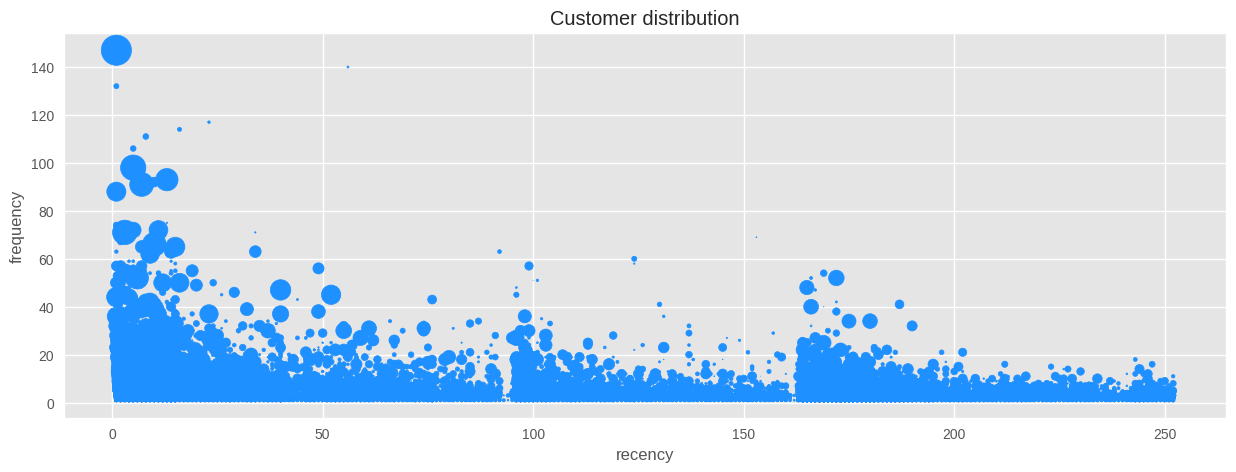

In [308]:
# Scatterplot to explore the distribution of customers
# Using 'monetary' as the size of the points, we see that
# the majority of customers who spend the most also purchase more frequently

plt.style.use('ggplot')
rfm.plot.scatter(x='recency',
                 y='frequency',
                 s=rfm['Sales Price Amount']*5e-5,
                 figsize=(15,5),
                 c='dodgerblue')

plt.gca().set(xlabel='recency',
              ylabel='frequency',
              title='Customer distribution');

In [307]:
# For Download RFM Sigmentation Data

from google.colab import files

# Example: save your DataFrame (e.g., df1b) to CSV
rfm.to_csv('cleaned_data.csv', index=False)

# Download to your computer
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [304]:
# Export the dataframe to a CSV file for processing in PowerBI
# (We added the parameter float_format='%.2f' for setting numbers to two decimals)

rfm.to_csv('RFM_Sigmentation.csv',
           encoding='utf-8',
           index=False,
           float_format='%.2f')

In [ ]:
END